In [28]:
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.python.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# データインポート
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 16s 0us/step


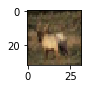

In [4]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[3],cmap="gray")
plt.show()

In [5]:
x_train = x_train/255.
x_test = x_test/255.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
tsb = TensorBoard(log_dir="../logs")

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [7]:
model = Sequential()
# (conv2d -> conv2d -> maxpooling -> dropout)
# -> (conv2d -> conv2d -> maxpooling -> dropout)
model.add(
    Conv2D(
        filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )
)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(
    Conv2D(
        filters=32,
        input_shape=(32, 32, 3),
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )
)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding="same",
        activation="relu"
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# ここまでの出力確認
# (data_size, height, width, channel)
model.output_shape

W0814 00:04:18.240250 140275268310848 deprecation.py:506] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(None, 8, 8, 32)

In [8]:
# このあと全結合層に入力するため、2次元に変換
model.add(Flatten())
model.output_shape

(None, 2048)

In [9]:
# FC -> Dropout -> FC
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation="softmax"))

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
tsb = TensorBoard(log_dir="../logs")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0

In [11]:
history_adam = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)
# ここでなぜかカーネルが落ちる

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 935us/sample - loss: 1.5567 - acc: 0.4306 - val_loss: 1.1579 - val_acc: 0.5836
Epoch 2/20
40000/40000 [==============================] - 12s 294us/sample - loss: 1.1585 - acc: 0.5860 - val_loss: 0.9903 - val_acc: 0.6493
Epoch 3/20
40000/40000 [==============================] - 12s 294us/sample - loss: 1.0107 - acc: 0.6455 - val_loss: 0.8808 - val_acc: 0.6903
Epoch 4/20
40000/40000 [==============================] - 12s 294us/sample - loss: 0.9206 - acc: 0.6743 - val_loss: 0.9025 - val_acc: 0.6844
Epoch 5/20
40000/40000 [==============================] - 12s 294us/sample - loss: 0.8473 - acc: 0.6995 - val_loss: 0.7976 - val_acc: 0.7251
Epoch 6/20
40000/40000 [==============================] - 12s 294us/sample - loss: 0.7984 - acc: 0.7205 - val_loss: 0.7611 - val_acc: 0.7325
Epoch 7/20
40000/40000 [==============================] - 12s 294us/sample - loss: 0.7568 - acc: 0.7347 

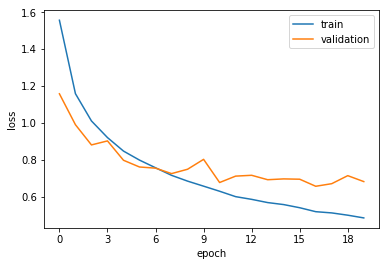

In [29]:
# loss プロット
plt.plot(history_adam.history["loss"], label="train")
plt.plot(history_adam.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

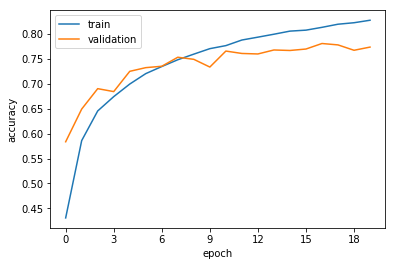

In [30]:
# 精度プロット
plt.plot(history_adam.history["acc"], label="train")
plt.plot(history_adam.history["val_acc"], label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.show()

shape of probs: (10000, 10)
[2.9618943e-06 2.6021205e-06 1.2399990e-05 9.4291848e-01 6.1394849e-07
 3.3121627e-02 5.8108335e-03 6.2638719e-07 1.8129820e-02 1.6721739e-07]


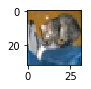

In [39]:
probs = model.predict(x_test)
print("shape of probs:", probs.shape)
print(probs[0])
plt.figure(figsize=(1,1))
plt.imshow(x_test[0])
plt.show()